In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

# Descriptivos Generales

### Descargando base de datos

In [2]:
ls

 Bases_de_datos/       Estimaciones.ipynb             LICENSE
 Descriptivos.ipynb    Estimaciones2.ipynb           'Link base'
 Descriptivos1.ipynb   Estimaciones_anuales.ipynb     README.md
 Descriptivos2.ipynb   Estimaciones_mensuales.ipynb


In [3]:
cd Bases_de_datos

/home/jovyan/midirectorio/Bases_de_datos


In [4]:
ls

Aprox_carpetas.png                          README.md
Bases_de_datos_modificadas_violencia.ipynb  datos_estimacion_anual.csv
Denuncias_por_alcaldia.csv                  denuncias_al_anio.csv
Estim_carpetas.png                          denuncias_mensuales.csv
Promedio_denuncias_alcaldia.csv             viol_numero_denuncias_ok.csv


In [5]:
violencia = pd.read_csv('denuncias_mensuales.csv')

### Trabajando base de datos

In [6]:
del violencia['Unnamed: 0']

In [7]:
del violencia ['index']

In [8]:
violencia['anio'] = violencia['anio'].apply(str)

In [9]:
violencia['mes'] = violencia['mes'].apply(str)

In [10]:
violencia['fecha'] = violencia['mes']+' '+ violencia['anio']

### Línea  de tiempo

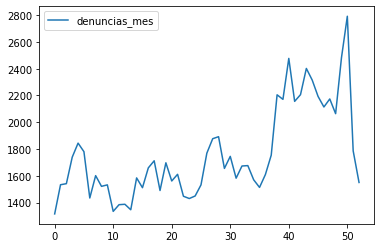

In [12]:
violencia.plot()

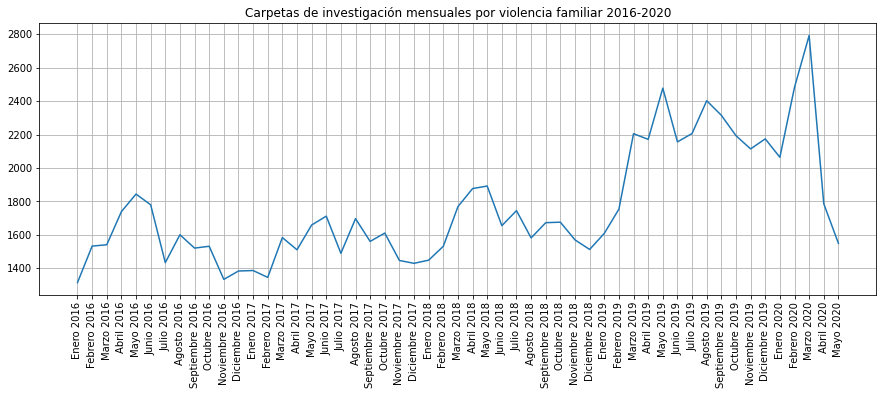

In [13]:
fig = plt.figure(figsize=(15, 5))
plt.plot(violencia['fecha'],violencia['denuncias_mes'])
x_pos = np.arange(len(violencia['fecha']))
plt.xticks(x_pos,violencia['fecha'], rotation='vertical',fontsize=10)
plt.title("Carpetas de investigación mensuales por violencia familiar 2016-2020")
plt.rc('grid', linestyle="-.", color='#CCCCCC')
plt.grid(True)
plt.savefig('Linea.png')
plt.show()

Los datos muestran una tendencia de sube y baja pero con una clara tendencia a la alza a partir de noviembre de 2018 que se abruptamente interrumpida a partir de marzo de 2020.  Las razones por las que se presenta esta tendencia la atribuimos a dos  hipótesis: 1) El incremento de denuncias  debido a la promoción por parte de grupos feministas y su descenso debido a la  confinación de las personas en sus hogares debido de la presencia del COVID, acompañada de la disminución en la capacidad de atención por parte de las fiscalías para atender denuncias. 2) El incremento por las mismas causas mencionadas, pero una disminución en su publicación debido a la presión social y de medios de comunicación

### Histogramas

##### Pruebas histogramas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7d2111cc0>]],
      dtype=object)

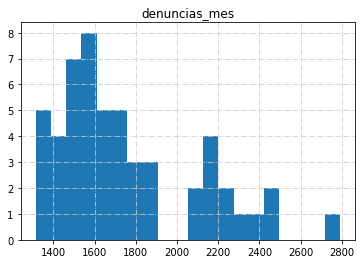

In [14]:
violencia.hist(bins=20)

##### Histograma final

Text(0.5, 0, 'Carpetas de investigación')

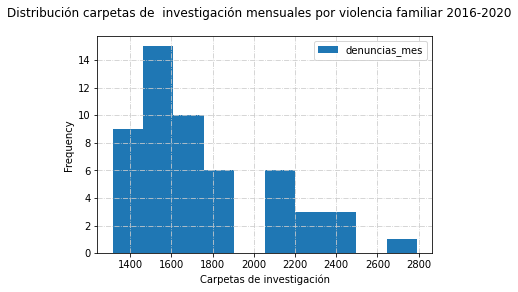

In [15]:
ax = violencia.plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Distribución carpetas de  investigación mensuales por violencia familiar 2016-2020',grid=True),
plt.xlabel("Carpetas de investigación")

En los histogrmas los valores se agrupan en rangos y nos ayudan a observar la distribución de los datos. Este gráfico nos muestra que las carpetas por mes están entre las 1,500 y 1,600. Habiendo meses excepcionales donde hay más de 2,600

# Descriptivos por Alcaldía 

### Descargando base de datos

In [16]:
violencia = pd.read_csv('Denuncias_por_alcaldia.csv')

In [17]:
violencia

,Unnamed: 0,anio,alcaldia,numero_denuncias
0,0,2016,ALVARO OBREGON,1330
1,1,2016,AZCAPOTZALCO,794
2,2,2016,BENITO JUAREZ,729
3,3,2016,COYOACAN,1276
4,4,2016,CUAJIMALPA DE MORELOS,280
...,...,...,...,...
75,75,2020,MILPA ALTA,152
76,76,2020,TLAHUAC,472
77,77,2020,TLALPAN,707
78,78,2020,VENUSTIANO CARRANZA,641


Text(0.5, 1.0, 'Número carpetas de investigación por alcaldía 2019')

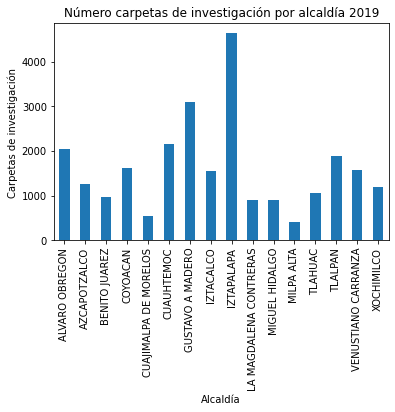

In [18]:
plot = violencia[violencia.anio == 2019].groupby("alcaldia")["numero_denuncias"].sum().plot(kind="bar")
plt.ylabel("Carpetas de investigación ")
plt.xlabel("Alcaldía")
plt.title("Número carpetas de investigación por alcaldía 2019")

Text(0.5, 1.0, 'Número carpetas de investigación por alcaldía 2020')

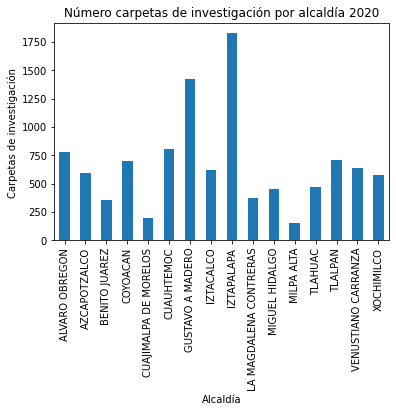

In [19]:
plot = violencia[violencia.anio == 2020].groupby("alcaldia")["numero_denuncias"].sum().plot(kind="bar")
plt.ylabel("Carpetas de investigación ")
plt.xlabel("Alcaldía")
plt.title("Número carpetas de investigación por alcaldía 2020")

Text(0.5, 1.0, 'Número carpetas de investigación por alcaldía 2016-2020')

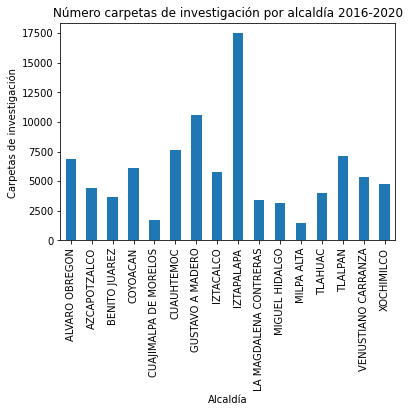

In [20]:
total = violencia.groupby("alcaldia")["numero_denuncias"].sum().plot(kind="bar")
plt.ylabel("Carpetas de investigación ")
plt.xlabel("Alcaldía")
plt.title("Número carpetas de investigación por alcaldía 2016-2020")

Los datos por alcaldía muestran en números absolutos que el grueso de la denuncias proviene de Iztapalapa, seguido por Gustavo A Madero. Mientras que alcaldía como Milpalta presentan el menor número de denuncias junto con Cuajimalpa. Esta proporción se presentó en los dos últimos años como en el agregado desde 2016.